## 데이터분석방법론(2) 기말과제

- 이 과목에서 배운 분석방법론(로지스틱회귀모형, 일반화선형모형, 로그선형모형, 혼합선형모형 등)을 이용하여 실제 데이터를 분석해 그 결과를 발표함

### 1. 데이터 찾기

#### (1) 관심 데이터: 한국고용정보원 취업현황 자료
- 고용노동부에서 운영중인 고용노동데이터 분석시스템(eis.work.go.kr/elds)에서는 다양한 고용노동 관련 데이터를 공개하고 있으며,   
그 중에서 취업현황_시군구(월) 자료를 내려받았다.

- 이 데이터는 2017년부터 2023년까지 유형별로 매월 취업건수가 몇 명인지 기록되어 있다.
  - 컬럼은 마감년월|근무시도|근무시군구|표준산업대분류|산업버전|직종중분류|직종버전|고용형태|거주시도|거주시군구|성별|연령5세단위|학력|취업건수 으로 구분된다.

#### (2) 데이터 읽기

- R을 사용하여 데이터를 분석하기 위해서 저장된 데이터를 dataframe 변수에 입력한다.

In [1]:
# 라이브러리 호출
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# 취업건수 파일 이름 리스트 작성
file_names <- c(  
  "job_matching_2017.txt",
  "job_matching_2018.txt",
  "job_matching_2019.txt",
  "job_matching_2020.txt",
  "job_matching_2021.txt",
  "job_matching_2022.txt",
  "job_matching_2023.txt"
)

# 파일을 하나씩 읽어서 병합
jm <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [3]:
# 취업건수 자료 읽기 결과 확인
head(jm)
nrow(jm) # 941만줄의 데이터가 존재한다.

,마감년월,근무시도,근무시군구,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,취업건수
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,26,26000,y,y,110000,2007,10,26,26200,M,10,3,2
2,201712,26,26320,y,y,220000,2007,99,26,26320,M,10,3,1
3,201712,41,41130,y,y,110000,2007,10,41,41610,M,11,3,1
4,201712,42,42810,y,y,230000,2007,20,42,42810,M,7,3,1
5,201712,43,43113,S,10,120000,2007,10,43,43114,F,3,5,1
6,201712,11,11380,y,y,110000,2007,10,11,11380,F,3,4,1


[1] 9412398

#### (3) 데이터 전처리

분석을 시작하기에 앞서 먼저 데이터를 살펴보고 수정 및 정제 작업을 하는 것이 우선이다.

1. 일단 각 컬럼별로 고유값과 count 를 살펴보고, 데이터로서 가치가 얼마나 있는지 판단한다.
2. 필요하면 분석에 필요한 형태로 컬럼을 변환한다.

##### 0. 중복 데이터 확인

aggregate 함수를 사용해서 중복된 데이터행이 있는지 확인한다.

In [4]:
jm1 = aggregate(취업건수 ~ 마감년월+근무시도+근무시군구+표준산업대분류+산업버전+직종중분류+직종버전+고용형태+거주시도+거주시군구+성별+연령5세단위+학력, data=jm, sum)

In [5]:
sum(jm$취업건수)
sum(jm1$취업건수)

[1] 12205525

[1] 12205525

##### 1. 마감년월 컬럼

In [6]:
# 마감년월 정보 확인
str(jm1$마감년월)
summary(jm1$마감년월)
table(jm1$마감년월)

 int [1:8070639] 201701 201705 201703 201703 201704 201708 201710 201710 201707 201701 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 201701  201808  202007  202005  202203  202312 


201701 201702 201703 201704 201705 201706 201707 201708 201709 201710 201711 
 98748 105868 130928 110041  96223 103681 109428 105176 114807  83931 106511 
201712 201801 201802 201803 201804 201805 201806 201807 201808 201809 201810 
 86782 105277  90471 119355 107122  94434  91176  99710  92611  88993  90710 
201811 201812 201901 201902 201903 201904 201905 201906 201907 201908 201909 
 95729  74604  99393  80271 114715 101803  91590  82809  95160  81546  80329 
201910 201911 201912 202001 202002 202003 202004 202005 202006 202007 202008 
 87165  81687  69005  87164  89775  94254  83326  76362  81518  88297  95915 
202009 202010 202011 202012 202101 202102 202103 202104 202105 202106 202107 
 98224  87549  91264  83612  97699  92105 129782 114864 103983 107735 114048 
202108 202109 202110 202111 202112 202201 202202 202203 202204 202205 202206 
 99892 104637 102154  98064  83467 105147  92929 122480 107088  94685  90139 
202207 202208 202209 202210 202211 202212 202301 202302 202303 

In [7]:
# "0000-00"로 변환한 마감년월2 컬럼 생성
jm1$마감년월2 <- format(as.Date(paste0(jm1$마감년월, "01"), "%Y%m%d"), "%Y-%m")

In [8]:
# 마감년월2 정보 확인
str(jm1$마감년월2)
summary(jm1$마감년월2)
table(jm1$마감년월2)

 chr [1:8070639] "2017-01" "2017-05" "2017-03" "2017-03" "2017-04" ...


   Length     Class      Mode 
  8070639 character character 


2017-01 2017-02 2017-03 2017-04 2017-05 2017-06 2017-07 2017-08 2017-09 2017-10 
  98748  105868  130928  110041   96223  103681  109428  105176  114807   83931 
2017-11 2017-12 2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07 2018-08 
 106511   86782  105277   90471  119355  107122   94434   91176   99710   92611 
2018-09 2018-10 2018-11 2018-12 2019-01 2019-02 2019-03 2019-04 2019-05 2019-06 
  88993   90710   95729   74604   99393   80271  114715  101803   91590   82809 
2019-07 2019-08 2019-09 2019-10 2019-11 2019-12 2020-01 2020-02 2020-03 2020-04 
  95160   81546   80329   87165   81687   69005   87164   89775   94254   83326 
2020-05 2020-06 2020-07 2020-08 2020-09 2020-10 2020-11 2020-12 2021-01 2021-02 
  76362   81518   88297   95915   98224   87549   91264   83612   97699   92105 
2021-03 2021-04 2021-05 2021-06 2021-07 2021-08 2021-09 2021-10 2021-11 2021-12 
 129782  114864  103983  107735  114048   99892  104637  102154   98064   83467 
2022-01 2022-02 2022-03 202

##### 2. 근무시도 & 근무시군구 / 거주시도 & 거주시군구

근무시도와 근무시군구는 취업자가 근무하는 지역을 나타내고, 거주시도와 거주시군구는 취업자가 거주하는 지역을 나타낸다.  
시군구까지 분류하면 자료가 너무 잘게 쪼개지므로 시도 까지만 사용하기로 한다.

In [9]:
# 시도 기준으로 취업건수를 합하여 jm2 변수에 저장한다.
# 마감년월2가 있으므로 마감년월은 뺀다.
jm2 = aggregate(취업건수 ~ 마감년월2+근무시도+표준산업대분류+산업버전+직종중분류+직종버전+고용형태+거주시도+성별+연령5세단위+학력, data=jm1, sum)

In [10]:
# 취업건수 합이 동일한지 확인
sum(jm1$취업건수)
sum(jm2$취업건수)

[1] 12205525

[1] 12205525

In [11]:
# 변환된 자료 확인
head(jm2)
nrow(jm2) # 349만줄의 데이터가 존재한다.

,마감년월2,근무시도,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,성별,연령5세단위,학력,취업건수
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>
1,2017-01,00,y,09,10000,2007,10,11,F,3,3,2
2,2017-05,00,y,09,10000,2007,10,11,F,3,3,1
3,2017-01,11,y,09,10000,2007,10,11,F,3,3,21
4,2017-02,11,y,09,10000,2007,10,11,F,3,3,22
5,2017-03,11,y,09,10000,2007,10,11,F,3,3,17
6,2017-04,11,y,09,10000,2007,10,11,F,3,3,17


[1] 3490712

In [12]:
# 근무시도, 거주시도 정보 확인
str(jm2$근무시도)
summary(jm2$근무시도)
table(jm2$근무시도)

str(jm2$거주시도)
summary(jm2$거주시도)
table(jm2$거주시도)

 chr [1:3490712] "00" "00" "11" "11" "11" "11" "11" "26" "42" "11" "11" ...


   Length     Class      Mode 
  3490712 character character 


     0     00     11     26     27     28     29     30     31     36     41 
 38420 205721 514032 262061 176721 208697 126314 126012 112558  37416 509056 
    42     43     44     45     46     47     48     50     51     A1 
113417 146205 153444 171669 131170 174885 214388  57436   9792   1298 

 chr [1:3490712] "11" "11" "11" "11" "11" "11" "11" "11" "11" "11" "11" ...


   Length     Class      Mode 
  3490712 character character 


    11     26     27     28     29     30     31     36     41     42     43 
380882 266406 189131 251131 134046 130983 120236  41445 632409 127298 160043 
    44     45     46     47     48     50     51      y 
170574 192817 154332 208378 259685  59663  11251      2 

In [13]:
# 시도가 코드로 되어 있어 직관적으로 이해하기 어려우므로 코드를 지명으로 변환하여 저장한다.
# 시도 코드와 지역명을 매핑한 데이터프레임 생성
mapping <- data.frame(
  코드 = c("0", "00", "11", "26", "27", "28", "29", "30", "31", "36", "41", "42", 
           "43", "44", "45", "46", "47", "48", "49", "50", "A1", "y", "z", "51", "52"),
  지역명 = c("[0,00]지역무관", "[0,00]지역무관", "[11]서울", "[26]부산", "[27]대구", "[28]인천", 
           "[29]광주", "[30]대전", "[31]울산", "[36]세종", "[41]경기", "[42,51]강원", 
           "[43]충북", "[44]충남", "[45,52]전북", "[46]전남", "[47]경북", "[48]경남", 
           "[49,50]제주", "[49,50]제주", "[A1]재택근무", "[y]분류불능", "[z]해당없음", "[42,51]강원", "[45,52]전북")
)

# 근무시도 매핑
jm2 <- merge(jm2, mapping, by.x = "근무시도", by.y = "코드", all.x = TRUE)
colnames(jm2)[ncol(jm2)] <- "근무시도명"

# 거주시도 매핑
jm2 <- merge(jm2, mapping, by.x = "거주시도", by.y = "코드", all.x = TRUE)
colnames(jm2)[ncol(jm2)] <- "거주시도명"

In [14]:
# 근무시도, 거주시도 정보 확인
str(jm2$근무시도명)
summary(jm2$근무시도명)
table(jm2$근무시도명)

str(jm2$거주시도명)
summary(jm2$거주시도명)
table(jm2$거주시도명)

 chr [1:3490712] "[11]서울" "[11]서울" "[11]서울" "[41]경기" ...


   Length     Class      Mode 
  3490712 character character 


[0,00]지역무관       [11]서울       [26]부산       [27]대구       [28]인천 
        244141         514032         262061         176721         208697 
      [29]광주       [30]대전       [31]울산       [36]세종       [41]경기 
        126314         126012         112558          37416         509056 
   [42,51]강원       [43]충북       [44]충남    [45,52]전북       [46]전남 
        123209         146205         153444         171669         131170 
      [47]경북       [48]경남    [49,50]제주   [A1]재택근무 
        174885         214388          57436           1298 

 chr [1:3490712] "[11]서울" "[11]서울" "[11]서울" "[11]서울" "[11]서울" ...


   Length     Class      Mode 
  3490712 character character 


   [11]서울    [26]부산    [27]대구    [28]인천    [29]광주    [30]대전 
     380882      266406      189131      251131      134046      130983 
   [31]울산    [36]세종    [41]경기 [42,51]강원    [43]충북    [44]충남 
     120236       41445      632409      138549      160043      170574 
[45,52]전북    [46]전남    [47]경북    [48]경남 [49,50]제주 [y]분류불능 
     192817      154332      208378      259685       59663           2 

##### 3. 표준산업대분류 & 산업버전

표준산업대분류와 산업버전은 취업자가 취업한 사업장의 산업분류와 해당 산업분류가 몇차 산업분류인지 나타낸다.

In [15]:
# 표준산업대분류, 산업버전 정보 확인
str(jm2$산업버전)
str(jm2$표준산업대분류)
summary(jm2$산업버전)
summary(jm2$표준산업대분류)
table(jm2$산업버전, jm2$표준산업대분류)

 chr [1:3490712] "y" "y" "09" "y" "y" "y" "y" "10" "y" "y" "10" "y" "y" "y" ...
 chr [1:3490712] "y" "y" "y" "y" "y" "y" "y" "P" "y" "y" "C" "y" "y" "y" ...


   Length     Class      Mode 
  3490712 character character 

   Length     Class      Mode 
  3490712 character character 

    
           A       B       C       D       E       F       G       H       I
  09     559      54   15472     180     424    2311    4935    1687    2622
  10    5294     400  190977    2124    4805   24267   55103   26830   24103
  y        0       0       0       0       0       0       0       0       0
    
           J       K       L       M       N       O       P       Q       R
  09    1303     584    1733    2226    9588    5213    3801    9484     603
  10   14137    5777   20049   25396  102002   31344   36081  128985    7541
  y        0       0       0       0       0       0       0       0       0
    
           S       T       U       y
  09    3153    1075       3  152128
  10   27984    9680      28       0
  y        0       0       0 2528667

산업 정보가 빠짐없이 입력되어 있긴 하지만, 대부분의 정보가 산업분류를 알수 없다는 의미의 "y"로 입력되어 있다.  
즉, 데이터로서의 가치가 크지 않다고 판단되므로 데이터분석에서 제외하기로 한다.

In [16]:
# 표준산업대분류와 산업버전을 제외하고 jm3 변수에 저장한다.
# 근무시도명과 거주시도명이 있으므로, 근무시도와 거주시도는 삭제한다.
jm3 = aggregate(취업건수 ~ 마감년월2+근무시도명+직종중분류+직종버전+고용형태+거주시도명+성별+연령5세단위+학력, data=jm2, sum)

In [17]:
sum(jm2$취업건수)
sum(jm3$취업건수)

[1] 12205525

[1] 12205525

In [18]:
# 변환된 자료 확인
head(jm3)
nrow(jm3) # 296만줄의 데이터가 존재한다.

,마감년월2,근무시도명,직종중분류,직종버전,고용형태,거주시도명,성별,연령5세단위,학력,취업건수
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>
1,2017-01,"[0,00]지역무관",10000,2007,10,[11]서울,F,3,3,2
2,2017-05,"[0,00]지역무관",10000,2007,10,[11]서울,F,3,3,1
3,2017-06,"[0,00]지역무관",10000,2007,10,[11]서울,F,3,3,1
4,2017-07,"[0,00]지역무관",10000,2007,10,[11]서울,F,3,3,1
5,2017-08,"[0,00]지역무관",10000,2007,10,[11]서울,F,3,3,2
6,2017-09,"[0,00]지역무관",10000,2007,10,[11]서울,F,3,3,1


[1] 2957137

##### 4. 직종중분류 & 직종버전

직종중분류와 직종버전은 취업자가 어떤 직종에서 일하고 있는지, 그리고 그 분류는 몇차 직업분류인지를 알려준다.


In [19]:
# 직종중분류, 직종버전 정보 확인
str(jm3$직종버전)
str(jm3$직종중분류)
summary(jm3$직종버전)
summary(jm3$직종중분류)
table(jm3$직종버전, jm3$직종중분류)

 int [1:2957137] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 chr [1:2957137] "10000" "10000" "10000" "10000" "10000" "10000" "10000" ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2007    2018    2018    2017    2018    2018 

   Length     Class      Mode 
  2957137 character character 

      
       010000 020000 030000  10000 100000 110000 120000 130000 140000 150000
  2007      0      0      0  23606  17990  26906  12349  20057  23175  20481
  2018  17761  49662   5616  84446      0   4077  12662  58323  79100 116705
      
       160000 170000 180000 190000  20000 200000 210000 220000 230000 240000
  2007  10649   7751   4115  22626  43399  10688   9581  24710   8238    232
  2018      0      0      0      0 225597      0  77236  16541 145998   3772
      
       250000  30000 300000  40000 410000 420000  50000 510000 520000 530000
  2007      0   5544      0  18078      0      0   3167      0      0      0
  2018    929  25424 137628      0  86654  19475      0  35790  31003 124324
      
       540000 550000 560000  60000 610000 620000  70000 700000  80000 810000
  2007      0      0      0  26350      0      0  22270      0  16225      0
  2018  74620  91988 107325      0 114028 113978      0  90551      0 107544
      
       820000 830000 840000 850000 860000

직종버전은 2007과 2018이 존재하는데, 데이터는 2017부터 2023년까지의 데이터이다.  
직종을 기준으로 분류를 하려면 직종버전이 일치해야 하므로 2017년 정보는 데이터에서 제외한다.

In [20]:
# 마감년월2의 앞 4자리가 2017이 아닌 데이터만 필터링
jm4 <- jm3[substr(jm3$마감년월2, 1, 4) != "2017", ]

In [21]:
sum(jm3$취업건수)
sum(jm4$취업건수)

[1] 12205525

[1] 10052864

In [22]:
# 직종중분류, 직종버전 정보 다시 확인
str(jm4$직종버전)
str(jm4$직종중분류)
summary(jm4$직종버전)
summary(jm4$직종중분류)
table(jm4$직종버전, jm4$직종중분류)

 int [1:2561691] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 chr [1:2561691] "010000" "010000" "010000" "010000" "010000" "010000" ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2018    2018    2018    2018    2018    2018 

   Length     Class      Mode 
  2561691 character character 

      
       010000 020000 030000  10000 110000 120000 130000 140000 150000  20000
  2018  17761  49662   5616  84446   4077  12662  58323  79100 116705 225597
      
       210000 220000 230000 240000 250000  30000 300000 410000 420000 510000
  2018  77236  16541 145998   3772    929  25424 137628  86654  19475  35790
      
       520000 530000 540000 550000 560000 610000 620000 700000 810000 820000
  2018  31003 124324  74620  91988 107325 114028 113978  90551 107544  55241
      
       830000 840000 850000 860000 870000 880000 890000 900000      y
  2018 117766  17173  38108  19318  50870  38810 121196  44451      1

2017년 정보를 제외하니 직종버전은 2018만 남았다. 즉, 직종버전 컬럼은 더 이상 필요없다.  
또한 직종중분류도 코드로 표시되어 있어 직관적으로 이해하기 어려우므로 직종중분류명으로 변환한다.

In [23]:
# 직종중분류 매핑 전 
# 코드: "10000" -> "010000", "20000" -> "020000", "30000" -> "030000" 으로 변환한다.
jm4$직종중분류[jm4$직종중분류 == "10000"] <- "010000"
jm4$직종중분류[jm4$직종중분류 == "20000"] <- "020000"
jm4$직종중분류[jm4$직종중분류 == "30000"] <- "030000"

# 직종중분류 매핑 데이터 생성
mapping <- data.frame(
  코드 = c("010000", "020000", "030000", "110000", "120000", "130000", "140000", 
          "150000", "210000", "220000", "230000", "240000", "250000", "300000", 
          "410000", "420000", "510000", "520000", "530000", "540000", "550000", 
          "560000", "610000", "620000", "700000", "810000", "820000", "830000", 
          "840000", "850000", "860000", "870000", "880000", "890000", "900000", "y"),
  직종명 = c("[01]관리직(임원·부서장)", "[02]경영·행정·사무직", "[03]금융·보험직", "[11]인문·사회과학 연구직", 
            "[12]자연·생명과학 연구직", "[13]정보통신 연구개발직 및 공학기술직", "[14]건설·채굴 연구개발직 및 공학기술직", 
            "[15]제조 연구개발직 및 공학기술직", "[21]교육직", "[22]법률직", "[23]사회복지·종교직", 
            "[24]경찰·소방·교도직", "[25]군인", "[30]보건·의료직", "[41]예술·디자인·방송직", 
            "[42]스포츠·레크리에이션직", "[51]미용·예식 서비스직", "[52]여행·숙박·오락 서비스직", 
            "[53]음식 서비스직", "[54]경호·경비직", "[55]돌봄 서비스직", "[56]청소 및 기타 개인서비스직", 
            "[61]영업·판매직", "[62]운전·운송직", "[70]건설·채굴직", "[81]기계 설치·정비·생산직", 
            "[82]금속·재료 설치·정비·생산직", "[83]전기·전자 설치·정비·생산직", 
            "[84]정보통신 설치·정비직", "[85]화학·환경 설치·정비·생산직", "[86]섬유·의복 생산직", 
            "[87]식품가공·생산직", "[88]인쇄·목재·공예 및 기타 설치·정비·생산직", 
            "[89]제조 단순직", "[90]농림어업직", "[y]분류불능")
)

# 직종중분류명 매핑
jm4 <- merge(jm4, mapping, by.x = "직종중분류", by.y = "코드", all.x = TRUE)
colnames(jm4)[ncol(jm4)] <- "직종중분류명"

In [24]:
# 직종중분류명 확인
table(jm4$직종중분류명)


                       [01]관리직(임원·부서장) 
                                         102207 
                         [02]경영·행정·사무직 
                                         275259 
                               [03]금융·보험직 
                                          31040 
                      [11]인문·사회과학 연구직 
                                           4077 
                      [12]자연·생명과학 연구직 
                                          12662 
          [13]정보통신 연구개발직 및 공학기술직 
                                          58323 
        [14]건설·채굴 연구개발직 및 공학기술직 
                                          79100 
              [15]제조 연구개발직 및 공학기술직 
                                         116705 
                                     [21]교육직 
                                          77236 
                                     [22]법률직 
                                          16541 
                           [23]사회복지·종교직 
                                         145998 
                       

In [25]:
head(jm4)

,직종중분류,마감년월2,근무시도명,직종버전,고용형태,거주시도명,성별,연령5세단위,학력,취업건수,직종중분류명
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,010000,2021-05,"[0,00]지역무관",2018,10,[11]서울,F,3,3,1,[01]관리직(임원·부서장)
2,010000,2021-09,"[0,00]지역무관",2018,10,[11]서울,F,3,3,2,[01]관리직(임원·부서장)
3,010000,2021-01,[11]서울,2018,10,[11]서울,F,3,3,4,[01]관리직(임원·부서장)
4,010000,2021-02,[11]서울,2018,10,[11]서울,F,3,3,6,[01]관리직(임원·부서장)
5,010000,2021-03,[11]서울,2018,10,[11]서울,F,3,3,7,[01]관리직(임원·부서장)
6,010000,2021-04,[11]서울,2018,10,[11]서울,F,3,3,6,[01]관리직(임원·부서장)


In [26]:
# 직종중분류와 직종버전을 제외하고 jm5 변수에 저장한다.
jm5 = aggregate(취업건수 ~ 마감년월2+근무시도명+직종중분류명+고용형태+거주시도명+성별+연령5세단위+학력, data=jm4, sum)

In [27]:
sum(jm4$취업건수)
sum(jm5$취업건수)

[1] 10052864

[1] 10052864

In [28]:
# 변환된 자료 확인
head(jm5)
nrow(jm5)  # 256만줄의 데이터가 존재한다.

,마감년월2,근무시도명,직종중분류명,고용형태,거주시도명,성별,연령5세단위,학력,취업건수
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>
1,2018-02,"[0,00]지역무관",[01]관리직(임원·부서장),10,[11]서울,F,3,3,1
2,2018-04,"[0,00]지역무관",[01]관리직(임원·부서장),10,[11]서울,F,3,3,1
3,2018-05,"[0,00]지역무관",[01]관리직(임원·부서장),10,[11]서울,F,3,3,1
4,2018-06,"[0,00]지역무관",[01]관리직(임원·부서장),10,[11]서울,F,3,3,1
5,2018-07,"[0,00]지역무관",[01]관리직(임원·부서장),10,[11]서울,F,3,3,1
6,2018-09,"[0,00]지역무관",[01]관리직(임원·부서장),10,[11]서울,F,3,3,1


[1] 2561691

##### 5. 고용형태

고용형태는 취업자의 고용형태가 기간의 정함이 있는지, 전일제인지 시간제인지, 아니면 일용직인지 등을 나타낸다.

In [29]:
# 고용형태 자료 확인인
table(jm5$고용형태)


     10      11      20      21      88      99 
1086966  214769  333555  110346   44148  771907 

그런데, 관계없음을 나타내는 '99' 값이 전체 자료에서 차지하는 비중이 약 30%로 크기 때문에 분석에 적합하지 않다고 판단된다.  
그래서 고용형태 컬럼은 삭제하기로 한다.

In [30]:
# 고용형태를 제외하고 jm6 변수에 저장한다.
jm6 = aggregate(취업건수 ~ 마감년월2+근무시도명+직종중분류명+거주시도명+성별+연령5세단위+학력, data=jm5, sum)

In [31]:
sum(jm5$취업건수)
sum(jm6$취업건수)

[1] 10052864

[1] 10052864

In [32]:
# 변환된 자료 확인
head(jm6)
nrow(jm6)  # 154만줄의 데이터가 존재한다.

,마감년월2,근무시도명,직종중분류명,거주시도명,성별,연령5세단위,학력,취업건수
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,2018-02,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,F,3,3,1
2,2018-04,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,F,3,3,1
3,2018-05,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,F,3,3,1
4,2018-06,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,F,3,3,1
5,2018-07,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,F,3,3,2
6,2018-09,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,F,3,3,1


[1] 1545697

##### 6. 성별

성별은 단순히 F, M 으로 나누어져 있다.

In [33]:
# 성별 확인
table(jm6$성별)


     F      M 
639017 906680 

In [34]:
# F->'여', M->'남' 으로 변환한다.
jm6$성별[jm6$성별 == "F"] <- "여"
jm6$성별[jm6$성별 == "M"] <- "남"

##### 7. 연령5세단위

연령5세단위 컬럼은 03->'29세 이하' 이고, 04, 05, 06 순으로 5세씩 끊어서 연령을 그룹핑한 결과이다.

In [35]:
# 연령5세단위 확인
table(jm6$연령5세단위)


     3      4      5      6      7      8      9     10     11     12 
346930 186694 167084 166419 166802 160643 144880 135086  71158      1 

연령은 10세 단위로 변환하기로 한다.

In [36]:
# 연령 매핑 데이터 생성
mapping <- data.frame(
  코드 = c(3,4,5,6,7,8,9,10,11,12),
  연령 = c("29세 이하", "30대", "30대", "40대", "40대", "50대", "50대", "60세 이상", "60세 이상", "무관")
)

# 연령령 매핑
jm6 <- merge(jm6, mapping, by.x = "연령5세단위", by.y = "코드", all.x = TRUE)
colnames(jm6)[ncol(jm6)] <- "연령"

In [37]:
# 변환된 자료 확인
head(jm6)
nrow(jm6)  # 154만줄의 데이터가 존재한다.

,연령5세단위,마감년월2,근무시도명,직종중분류명,거주시도명,성별,학력,취업건수,연령
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,3,2018-02,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,여,3,1,29세 이하
2,3,2018-04,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,여,3,1,29세 이하
3,3,2018-05,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,여,3,1,29세 이하
4,3,2018-06,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,여,3,1,29세 이하
5,3,2018-07,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,여,3,2,29세 이하
6,3,2018-09,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,여,3,1,29세 이하


[1] 1545697

In [38]:
# 연령5세단위를 제외하고 jm7 변수에 저장한다.
jm7 = aggregate(취업건수 ~ 마감년월2+근무시도명+직종중분류명+거주시도명+성별+연령+학력, data=jm6, sum)

In [39]:
sum(jm6$취업건수)
sum(jm7$취업건수)

[1] 10052864

[1] 10052864

In [40]:
# 변환된 자료 확인
head(jm7)
nrow(jm7)  # 120만줄의 데이터가 존재한다.

,마감년월2,근무시도명,직종중분류명,거주시도명,성별,연령,학력,취업건수
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,3,3
2,2018-02,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,3,4
3,2018-03,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,3,3
4,2018-04,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,3,1
5,2018-05,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,3,1
6,2018-06,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,3,2


[1] 1201149

##### 8. 학력

학력 컬럼은 취업자의 학력 수준을 나타낸다.

In [41]:
table(jm7$학력)


     3      4      5      6      y 
427010 295643 362527  81762  34207 

In [42]:
# 3->'고졸 이하', 4->'전문대졸', 5->'대졸', 6->'대학원졸 이상', y->'분류불능'으로 변환한다.
jm7$학력[jm7$학력 == "3"] <- "고졸 이하"
jm7$학력[jm7$학력 == "4"] <- "전문대졸"
jm7$학력[jm7$학력 == "5"] <- "대졸"
jm7$학력[jm7$학력 == "6"] <- "대학원졸 이상"
jm7$학력[jm7$학력 == "y"] <- "분류불능"


In [43]:
# 학력 다시 확인
table(jm7$학력)


    고졸 이하          대졸 대학원졸 이상      분류불능      전문대졸 
       427010        362527         81762         34207        295643 

##### 9. 취업건수

취업건수는 데이터의 반응변수 이다.
해당 마감년월, 근무시도, 직종중분류, 거주시도, 성별, 연령, 학력 에 해당하는 취업자가 몇 명인지를 나타낸다.

In [44]:
table(jm7$취업건수)


     1      2      3      4      5      6      7      8      9     10     11 
568890 176822  93302  59275  41559  30811  24305  19438  15824  13138  11523 
    12     13     14     15     16     17     18     19     20     21     22 
  9788   8804   7617   6845   6259   5658   5243   4687   4442   3966   3686 
    23     24     25     26     27     28     29     30     31     32     33 
  3551   3189   2995   2738   2595   2422   2283   2073   1978   1960   1778 
    34     35     36     37     38     39     40     41     42     43     44 
  1654   1638   1522   1451   1357   1361   1283   1201   1159   1074   1042 
    45     46     47     48     49     50     51     52     53     54     55 
  1030    960    908    849    830    756    773    769    724    674    664 
    56     57     58     59     60     61     62     63     64     65     66 
   613    612    546    546    515    545    488    477    493    470    475 
    67     68     69     70     71     72     73     74     75 

In [45]:
str(jm7$취업건수)
summary(jm7$취업건수)

 int [1:1201149] 3 4 3 1 1 2 1 1 2 3 ...


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    1.000    2.000    8.369    5.000 4407.000 

In [46]:
# 마지막 확인
head(jm7)

,마감년월2,근무시도명,직종중분류명,거주시도명,성별,연령,학력,취업건수
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,고졸 이하,3
2,2018-02,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,고졸 이하,4
3,2018-03,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,고졸 이하,3
4,2018-04,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,고졸 이하,1
5,2018-05,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,고졸 이하,1
6,2018-06,"[0,00]지역무관",[01]관리직(임원·부서장),[11]서울,남,29세 이하,고졸 이하,2


In [47]:
# 데이터 변환 중에 오류는 없는지 확인한다.
sum(jm$취업건수)
sum(jm1$취업건수)
sum(jm2$취업건수)
sum(jm3$취업건수)
sum(jm4$취업건수) # 2017년 데이터 제외하면서 취업건수 감소소
sum(jm5$취업건수)
sum(jm6$취업건수)
sum(jm7$취업건수)

[1] 12205525

[1] 12205525

[1] 12205525

[1] 12205525

[1] 10052864

[1] 10052864

[1] 10052864

[1] 10052864

#### (4) 최종 데이터 작성

데이터를 그대로 읽은 jm 부터 시작해서, 여러 과정을 거쳐 jm7 까지 데이터를 정리하였다.  
jm7을 다시 data로 저장해서 분석을 시작한다.

In [48]:
# 성별과 학력별로 취업건수의 합을 계산
data1 <- jm7 %>%
  group_by(마감년월2, 근무시도명, 직종중분류명, 연령, 학력, 성별) %>%
  summarise(총취업건수 = sum(취업건수))

`summarise()` has grouped output by '마감년월2', '근무시도명', '직종중분류명',
'연령', '학력'. You can override using the `.groups` argument.


In [49]:
# 데이터 전처리: 범주형 변환
data1$마감년월2 <- as.factor(data1$마감년월2)
data1$근무시도명 <- as.factor(data1$근무시도명)
data1$직종중분류명 <- as.factor(data1$직종중분류명)
data1$성별 <- as.factor(data1$성별)
data1$연령 <- as.factor(data1$연령)
data1$학력 <- as.factor(data1$학력)

In [50]:
# 결과 확인
head(data1)

마감년월2,근무시도명,직종중분류명,연령,학력,성별,총취업건수
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),29세 이하,고졸 이하,남,39
2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),29세 이하,고졸 이하,여,13
2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),29세 이하,대졸,남,77
2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),29세 이하,대졸,여,26
2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),29세 이하,대학원졸 이상,남,2
2018-01,"[0,00]지역무관",[01]관리직(임원·부서장),29세 이하,전문대졸,남,24


In [58]:
# 성별과 학력별로 취업건수의 합을 계산
data2 <- jm7 %>%
  group_by(마감년월2, 거주시도명, 직종중분류명, 연령, 학력, 성별) %>%
  summarise(총취업건수 = sum(취업건수))

`summarise()` has grouped output by '마감년월2', '거주시도명', '직종중분류명',
'연령', '학력'. You can override using the `.groups` argument.


In [59]:
# 데이터 전처리: 범주형 변환
data2$마감년월2 <- as.factor(data2$마감년월2)
data2$거주시도명 <- as.factor(data2$거주시도명)
data2$직종중분류명 <- as.factor(data2$직종중분류명)
data2$성별 <- as.factor(data2$성별)
data2$연령 <- as.factor(data2$연령)
data2$학력 <- as.factor(data2$학력)

In [60]:
# 결과 확인
head(data2)

마감년월2,거주시도명,직종중분류명,연령,학력,성별,총취업건수
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2018-01,[11]서울,[01]관리직(임원·부서장),29세 이하,고졸 이하,남,57
2018-01,[11]서울,[01]관리직(임원·부서장),29세 이하,고졸 이하,여,35
2018-01,[11]서울,[01]관리직(임원·부서장),29세 이하,대졸,남,74
2018-01,[11]서울,[01]관리직(임원·부서장),29세 이하,대졸,여,65
2018-01,[11]서울,[01]관리직(임원·부서장),29세 이하,대학원졸 이상,남,2
2018-01,[11]서울,[01]관리직(임원·부서장),29세 이하,대학원졸 이상,여,5


연령, 학력, 성별 변수에 대해서 전진선택법(Forward Selection)을 사용하여 모델을 선택해본다.

In [66]:
model_null = glm(총취업건수 ~ 1, data=data2, family=poisson)
summary(model_null)


Call:
glm(formula = 총취업건수 ~ 1, family = poisson, data = data2)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 2.5871232  0.0003154    8203   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 30572533  on 756338  degrees of freedom
Residual deviance: 30572533  on 756338  degrees of freedom
AIC: 33044921

Number of Fisher Scoring iterations: 7


In [62]:
model1_1 = glm(총취업건수 ~ 근무시도명, data=data1, family=poisson)
summary(model1_1)


Call:
glm(formula = 총취업건수 ~ 근무시도명, family = poisson, 
    data = data1)

Coefficients:
                        Estimate Std. Error  z value Pr(>|z|)    
(Intercept)             2.006047   0.001806 1110.823   <2e-16 ***
근무시도명[11]서울      1.251382   0.001955  640.174   <2e-16 ***
근무시도명[26]부산      0.684112   0.002128  321.508   <2e-16 ***
근무시도명[27]대구      0.146383   0.002411   60.712   <2e-16 ***
근무시도명[28]인천      0.439871   0.002247  195.771   <2e-16 ***
근무시도명[29]광주      0.004826   0.002604    1.853   0.0638 .  
근무시도명[30]대전     -0.305269   0.002825 -108.043   <2e-16 ***
근무시도명[31]울산      0.003718   0.002690    1.382   0.1669    
근무시도명[36]세종     -0.588856   0.004101 -143.583   <2e-16 ***
근무시도명[41]경기      1.471155   0.001924  764.498   <2e-16 ***
근무시도명[42,51]강원   0.231367   0.002453   94.335   <2e-16 ***
근무시도명[43]충북      0.210780   0.002445   86.191   <2e-16 ***
근무시도명[44]충남      0.157614   0.002482   63.512   <2e-16 ***
근무시도명[45,52]전북   0.322866   0.002324  138.940   <2e-16 ***
근무시도명[46]전남  

In [63]:
model1_2 = glm(총취업건수 ~ 거주시도명, data=data2, family=poisson)
summary(model1_2)


Call:
glm(formula = 총취업건수 ~ 거주시도명, family = poisson, 
    data = data2)

Coefficients:
                        Estimate Std. Error  z value Pr(>|z|)    
(Intercept)            3.0882580  0.0008287 3726.544  < 2e-16 ***
거주시도명[26]부산    -0.3939126  0.0013926 -282.863  < 2e-16 ***
거주시도명[27]대구    -0.9085251  0.0017700 -513.300  < 2e-16 ***
거주시도명[28]인천    -0.5900706  0.0015159 -389.247  < 2e-16 ***
거주시도명[29]광주    -1.0649353  0.0020245 -526.029  < 2e-16 ***
거주시도명[30]대전    -1.3682237  0.0022913 -597.150  < 2e-16 ***
거주시도명[31]울산    -1.0719574  0.0021281 -503.713  < 2e-16 ***
거주시도명[36]세종    -1.7555140  0.0037599 -466.907  < 2e-16 ***
거주시도명[41]경기     0.4705468  0.0010358  454.281  < 2e-16 ***
거주시도명[42,51]강원 -0.8524373  0.0018270 -466.579  < 2e-16 ***
거주시도명[43]충북    -0.8658810  0.0018146 -477.167  < 2e-16 ***
거주시도명[44]충남    -0.9225637  0.0018559 -497.095  < 2e-16 ***
거주시도명[45,52]전북 -0.7392866  0.0016501 -448.017  < 2e-16 ***
거주시도명[46]전남    -0.7875809  0.0018067 -435.927  < 2e-16 ***
거주시도명[47]경북  

In [64]:
model1_3 = glm(총취업건수 ~ 마감년월2, data=data2, family=poisson)
summary(model1_3)


Call:
glm(formula = 총취업건수 ~ 마감년월2, family = poisson, 
    data = data2)

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)       2.788244   0.002430 1147.314  < 2e-16 ***
마감년월22018-02 -0.129118   0.003589  -35.978  < 2e-16 ***
마감년월22018-03  0.110999   0.003293   33.709  < 2e-16 ***
마감년월22018-04 -0.005246   0.003421   -1.533   0.1252    
마감년월22018-05 -0.093775   0.003545  -26.453  < 2e-16 ***
마감년월22018-06 -0.098311   0.003588  -27.400  < 2e-16 ***
마감년월22018-07 -0.022858   0.003472   -6.584 4.58e-11 ***
마감년월22018-08 -0.105381   0.003573  -29.496  < 2e-16 ***
마감년월22018-09 -0.181796   0.003653  -49.772  < 2e-16 ***
마감년월22018-10 -0.119168   0.003591  -33.183  < 2e-16 ***
마감년월22018-11 -0.083876   0.003540  -23.696  < 2e-16 ***
마감년월22018-12 -0.270246   0.003827  -70.615  < 2e-16 ***
마감년월22019-01 -0.084249   0.003535  -23.836  < 2e-16 ***
마감년월22019-02 -0.247765   0.003756  -65.968  < 2e-16 ***
마감년월22019-03 -0.022333   0.003397   -6.575 4.86e-11 ***
마감년월2201

In [65]:
model1_4 = glm(총취업건수 ~ 직종중분류명, data=data2, family=poisson)
summary(model1_4)


Call:
glm(formula = 총취업건수 ~ 직종중분류명, family = poisson, 
    data = data2)

Coefficients:
                                                             Estimate
(Intercept)                                                  1.826376
직종중분류명[02]경영·행정·사무직                           1.848297
직종중분류명[03]금융·보험직                                -0.700570
직종중분류명[11]인문·사회과학 연구직                       -1.403734
직종중분류명[12]자연·생명과학 연구직                       -1.198325
직종중분류명[13]정보통신 연구개발직 및 공학기술직            0.329520
직종중분류명[14]건설·채굴 연구개발직 및 공학기술직         -0.148623
직종중분류명[15]제조 연구개발직 및 공학기술직                0.314833
직종중분류명[21]교육직                                      -0.176079
직종중분류명[22]법률직                                      -1.004038
직종중분류명[23]사회복지·종교직                             0.707522
직종중분류명[24]경찰·소방·교도직                          -1.467351
직종중분류명[25]군인                                        -1.697414
직종중분류명[30]보건·의료직                                 0.800134
직종중분류명[41]예술·디자인·방송직                         0.50

In [67]:
model1_5 = glm(총취업건수 ~ 연령, data=data2, family=poisson)
summary(model1_5)


Call:
glm(formula = 총취업건수 ~ 연령, family = poisson, data = data2)

Coefficients:
                Estimate Std. Error  z value Pr(>|z|)    
(Intercept)    2.5292397  0.0006792 3724.052   <2e-16 ***
연령30대      -0.3068254  0.0010629 -288.676   <2e-16 ***
연령40대      -0.1856975  0.0010295 -180.385   <2e-16 ***
연령50대       0.1861138  0.0009531  195.263   <2e-16 ***
연령60세 이상  0.5596910  0.0009296  602.079   <2e-16 ***
연령무관      -2.5292397  1.0000002   -2.529   0.0114 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 30572533  on 756338  degrees of freedom
Residual deviance: 29664248  on 756333  degrees of freedom
AIC: 32136646

Number of Fisher Scoring iterations: 7


In [68]:
model1_6 = glm(총취업건수 ~ 학력, data=data2, family=poisson)
summary(model1_6)


Call:
glm(formula = 총취업건수 ~ 학력, family = poisson, data = data2)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        2.9317667  0.0004577  6406.1   <2e-16 ***
학력대졸          -0.6224502  0.0008231  -756.3   <2e-16 ***
학력대학원졸 이상 -2.0110389  0.0025065  -802.3   <2e-16 ***
학력분류불능       0.8776112  0.0009799   895.6   <2e-16 ***
학력전문대졸      -0.7967835  0.0009041  -881.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 30572533  on 756338  degrees of freedom
Residual deviance: 27248988  on 756334  degrees of freedom
AIC: 29721384

Number of Fisher Scoring iterations: 7


In [70]:
model1_7 = glm(총취업건수 ~ 성별, data=data2, family=poisson)
summary(model1_7)


Call:
glm(formula = 총취업건수 ~ 성별, family = poisson, data = data2)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 2.2403968  0.0005035    4450   <2e-16 ***
성별여      0.6582461  0.0006459    1019   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 30572533  on 756338  degrees of freedom
Residual deviance: 29502663  on 756337  degrees of freedom
AIC: 31975053

Number of Fisher Scoring iterations: 7


In [74]:
model_fw = step(model_null, scope = ~ 거주시도명+직종중분류명+연령+학력+성별, direction="forward")
summary(model_fw)

Start:  AIC=33044921
총취업건수 ~ 1

               Df Deviance      AIC
+ 직종중분류명 35 23588618 26061076
+ 학력          4 27248988 29721384
+ 거주시도명   17 27264506 29736928
+ 성별          1 29502663 31975053
+ 연령          5 29664248 32136646
<none>            30572533 33044921

Step:  AIC=26061076
총취업건수 ~ 직종중분류명

             Df Deviance      AIC
+ 거주시도명 17 19670154 22142646
+ 학력        4 20910259 23382725
+ 성별        1 22796533 25268993
+ 연령        5 23103367 25575834
<none>          23588618 26061076

Step:  AIC=22142646
총취업건수 ~ 직종중분류명 + 거주시도명

       Df Deviance      AIC
+ 학력  4 16762198 19234697
+ 성별  1 18896636 21369130
+ 연령  5 19222333 21694835
<none>    19670154 22142646

Step:  AIC=19234697
총취업건수 ~ 직종중분류명 + 거주시도명 + 학력

       Df Deviance      AIC
+ 성별  1 16198554 18671056
+ 연령  5 16390111 18862621
<none>    16762198 19234697

Step:  AIC=18671056
총취업건수 ~ 직종중분류명 + 거주시도명 + 학력 + 
    성별

       Df Deviance      AIC
+ 연령  5 15783391 18255902
<none>    16198554 18671056

Step:  AIC=18255902
총취업


Call:
glm(formula = 총취업건수 ~ 직종중분류명 + 거주시도명 + 
    학력 + 성별 + 연령, family = poisson, data = data2)

Coefficients:
                                                              Estimate
(Intercept)                                                  2.8077641
직종중분류명[02]경영·행정·사무직                           1.8754265
직종중분류명[03]금융·보험직                                -0.9420861
직종중분류명[11]인문·사회과학 연구직                       -1.1172816
직종중분류명[12]자연·생명과학 연구직                       -1.1160246
직종중분류명[13]정보통신 연구개발직 및 공학기술직            0.3432200
직종중분류명[14]건설·채굴 연구개발직 및 공학기술직         -0.0395573
직종중분류명[15]제조 연구개발직 및 공학기술직                0.4696869
직종중분류명[21]교육직                                      -0.2521469
직종중분류명[22]법률직                                      -1.2740799
직종중분류명[23]사회복지·종교직                             0.7003538
직종중분류명[24]경찰·소방·교도직                          -1.7967720
직종중분류명[25]군인                                        -2.1855054
직종중분류명[30]보건·의료직                                 0.7016786
직종중분류명[41]예

In [52]:
# 빈 모델
model_null = glm(총취업건수~1, data=data1, family=poisson)

# Forward Selection
model_fw = step(model_null, scope = ~ 연령+학력+성별, direction="forward")

# 결과
summary(model_fw)

)

Start:  AIC=33421988
총취업건수 ~ 1

       Df Deviance      AIC
+ 학력  4 27627628 30144628
+ 성별  1 29785631 32302625
+ 연령  5 30008648 32525651
<none>    30904996 33421988

Step:  AIC=30144628
총취업건수 ~ 학력

       Df Deviance      AIC
+ 성별  1 26755857 29272859
+ 연령  5 27004343 29521354
<none>    27627628 30144628

Step:  AIC=29272859
총취업건수 ~ 학력 + 성별

       Df Deviance      AIC
+ 연령  5 26043834 28560847
<none>    26755857 29272859

Step:  AIC=28560847
총취업건수 ~ 학력 + 성별 + 연령




Call:
glm(formula = 총취업건수 ~ 학력 + 성별 + 연령, family = poisson, 
    data = data1)

Coefficients:
                    Estimate Std. Error  z value Pr(>|z|)    
(Intercept)        2.5225725  0.0008619 2926.710  < 2e-16 ***
학력대졸          -0.5368382  0.0008266 -649.482  < 2e-16 ***
학력대학원졸 이상 -1.9141804  0.0025075 -763.388  < 2e-16 ***
학력분류불능       0.7712435  0.0009900  779.049  < 2e-16 ***
학력전문대졸      -0.7138234  0.0009077 -786.391  < 2e-16 ***
성별여             0.6297340  0.0006517  966.308  < 2e-16 ***
연령30대          -0.2784797  0.0010633 -261.901  < 2e-16 ***
연령40대          -0.2317445  0.0010317 -224.623  < 2e-16 ***
연령50대           0.0867698  0.0009599   90.394  < 2e-16 ***
연령60세 이상      0.4798562  0.0009411  509.880  < 2e-16 ***
연령무관          -3.1523064  1.0000003   -3.152  0.00162 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 30904996  on 776241  degrees of freedom
Residual deviance: 260

In [53]:
# 성별-학력의 상호작용까지 감안한 모델을 적합해본다.
model2 = glm(총취업건수 ~ 성별*학력+연령, data=data1, family=poisson)
summary(model2)


Call:
glm(formula = 총취업건수 ~ 성별 * 학력 + 연령, family = poisson, 
    data = data1)

Coefficients:
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)               2.6623285  0.0009127 2917.030  < 2e-16 ***
성별여                    0.4044268  0.0009219  438.701  < 2e-16 ***
학력대졸                 -0.6200618  0.0012136 -510.940  < 2e-16 ***
학력대학원졸 이상        -1.9141022  0.0035644 -537.006  < 2e-16 ***
학력분류불능             -1.4271181  0.0047498 -300.459  < 2e-16 ***
학력전문대졸             -0.8539378  0.0013797 -618.928  < 2e-16 ***
연령30대                 -0.2821751  0.0010635 -265.333  < 2e-16 ***
연령40대                 -0.2386146  0.0010326 -231.076  < 2e-16 ***
연령50대                  0.0723122  0.0009624   75.140  < 2e-16 ***
연령60세 이상             0.4669254  0.0009434  494.964  < 2e-16 ***
연령무관                 -3.0667553  1.0000004   -3.067  0.00216 ** 
성별여:학력대졸           0.1345647  0.0016539   81.364  < 2e-16 ***
성별여:학력대학원졸 이상 -0.0210013  0.0050167   -4.186 2.84e-05 ***
성별

In [57]:
# 성별-직종의 상호작용 모델을 적합해본다.
model3 = glm(총취업건수 ~ 성별*직종중분류명, data=data1, family=poisson)
summary(model3)


Call:
glm(formula = 총취업건수 ~ 성별 * 직종중분류명, 
    family = poisson, data = data1)

Coefficients: (1 not defined because of singularities)
                                                                    Estimate
(Intercept)                                                         2.028406
성별여                                                             -0.755735
직종중분류명[02]경영·행정·사무직                                  1.017650
직종중분류명[03]금융·보험직                                       -0.993661
직종중분류명[11]인문·사회과학 연구직                              -1.705413
직종중분류명[12]자연·생명과학 연구직                              -1.535943
직종중분류명[13]정보통신 연구개발직 및 공학기술직                   0.213889
직종중분류명[14]건설·채굴 연구개발직 및 공학기술직                -0.219146
직종중분류명[15]제조 연구개발직 및 공학기술직                       0.277595
직종중분류명[21]교육직                                             -1.152123
직종중분류명[22]법률직                                             -1.383985
직종중분류명[23]사회복지·종교직                                   -0.722314
직종중분류명[24]경찰·소방·교도직 

In [56]:
# 전체 변수를 반영한 모델을 만들어보자.
model_full = glm(총취업건수 ~ 마감년월2+근무시도명+직종중분류명+연령+학력+성별, data=data1, family=poisson)

# 결과
summary(model_full)


Call:
glm(formula = 총취업건수 ~ 마감년월2 + 근무시도명 + 
    직종중분류명 + 연령 + 학력 + 성별, family = poisson, 
    data = data1)

Coefficients:
                                                              Estimate
(Intercept)                                                  1.9752640
마감년월22018-02                                            -0.1395503
마감년월22018-03                                             0.1624267
마감년월22018-04                                             0.0001103
마감년월22018-05                                            -0.1007520
마감년월22018-06                                            -0.1471125
마감년월22018-07                                            -0.0315048
마감년월22018-08                                            -0.1379615
마감년월22018-09                                            -0.2041288
마감년월22018-10                                            -0.1452235
마감년월22018-11                                            -0.1080531
마감년월22018-12                                            -0.3277

Warning message:
"Removed 14043 rows containing non-finite outside the scale range
(`stat_bin()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`)."


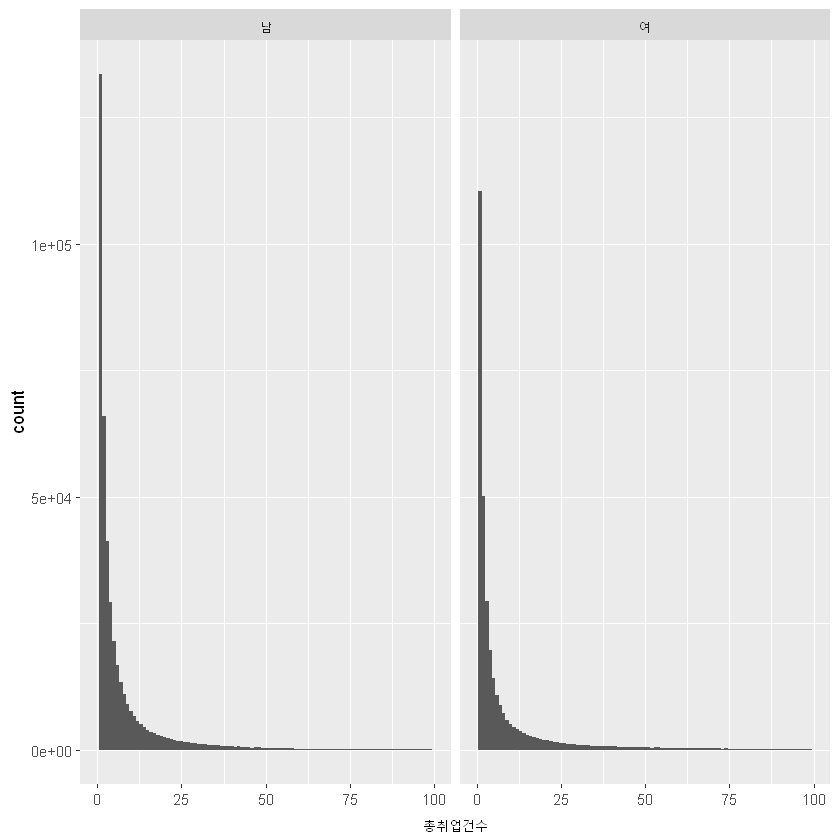

In [52]:
library(ggplot2)
ggplot(data1, aes(x=총취업건수)) + 
    geom_histogram(binwidth=1) + 
    xlim(0,100) +
    facet_wrap(~성별)